# Statistical Analysis of the Jpred4 dataset

## Computing basic statistics on our training dataset
* Assessing the adequacy of the dataset for our purposes
* Demonstrate that the dataset is a proper snapshot of the real protein space
* Describe the dataset producing the following plots:
    1. [The distribution of domain lengths](#first) (boxplot or hist/distplot)
    2. [The relative abundance of secondary structure conformations (pie)](#2)
    3. [Comparative amino-acid composition of (countplot normalized)](#3):
        5.1. [The entire dataset](#5.1.)
        5.2. [The fraction of helix, strand and coil residues](#5.2.)
    1. Taxonomic classification (at superkingdom [pie] and species level [pie or countplot,
reducing the number of species to top 5/10/20])
    1. [Structural classification &rarr; SCOP class (pie/countplot)](#5)
 

### The JPred4 dataset
http://www.compbio.dundee.ac.uk/jpred/about_RETR_JNetv231_details.shtml
*Starting set: 1987 representative domain sequences from each superfamily in SCOP
v2.04
    * Reducing the likelihood of trivially detectable sequence similarities
    * Ensuring high coverage of all possible 3D folds
    * A good snapshot of the real protein domain space
* Additional filters (retaining 1497 out of 1987 domain sequences):
    * Low-resolution (>2.5 Å) data removed
    * Sequence length >30 (unlikely represent protein domains) and <800 (to avoid time-consuming PSIBLAST runs)
    * Missing DSSP information for >9 consecutive residues
    * Other filters: fragments removed, accession mapping inconsistencies, failed PSIBLAST profile generation
* Data split into training (1348) and blind-test (149) sets by JPred4 authors
* For our purposes we retain only the training subset containing 1348 domain sequences
    * We will generate our own blind-test set from scratch as part of the exercise
    

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
!locate jpred4.tsv

/Users/ila/01-Unibo/02_Lab2/jpred4.tsv


### Creating a Pandas Dataframe:

In [6]:
# loading jpred data set
jpred = pd.read_csv('/Users/ila/01-Unibo/02_Lab2/jpred4.tsv', sep='\t')
jpred


,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus
...,...,...,...,...,...,...,...,...
1343,e1n13.1B,1n13,d.155.1.2,Alpha and beta (a+b),112,archaea,2190,Methanocaldococcus jannaschii
1344,e1qd6.1C,1qd6,f.4.2.1,Membrane and cell surface proteins and peptides,240,bacteria,562,Escherichia coli
1345,e1qqp.12,1qqp,b.121.4.1,All beta,216,viruses,12110,Foot-and-mouth disease virus
1346,e1qtn.1A,1qtn,c.17.1.1,Alpha and beta (a/b),152,eukaryota,9606,Homo sapiens


In [7]:
# how many unique ids?
jpred.SCOPID.nunique()

1344

In [8]:
# How many scop classes?
jpred.SCOPClass.nunique()

7

## [1. Distribution of Domain Lengths](#first)
* Sepparating by SCOPClass

1.1. Boxplot:
* SCOPClass will be shown on the x axis 
* Domain length will be shown on the y axis

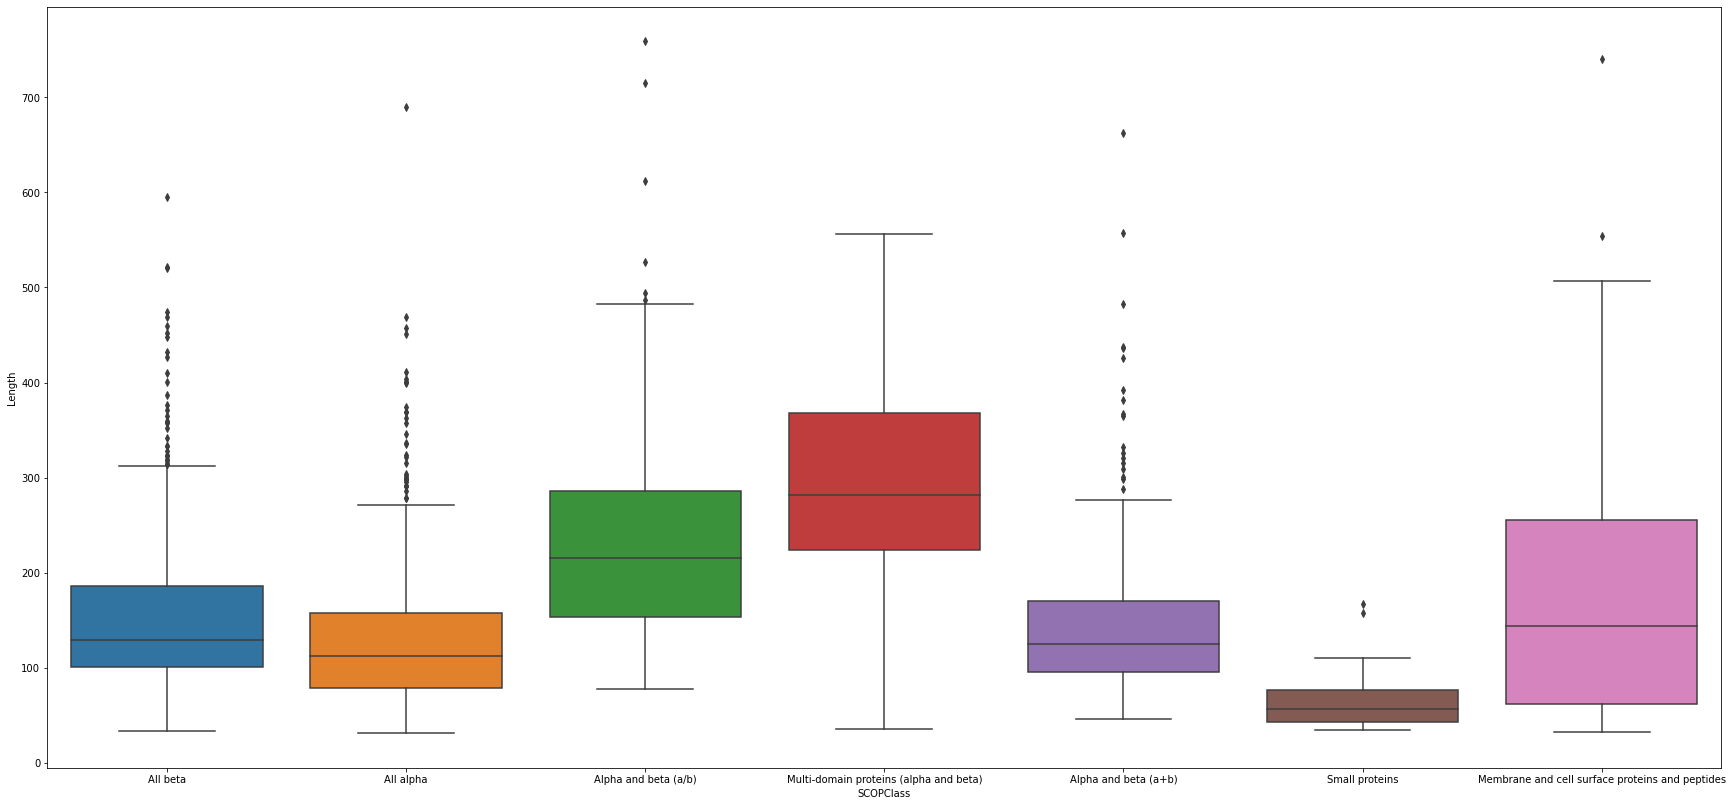

In [9]:
plt.figure(figsize=(30,14))
sns.boxplot(x = "SCOPClass",y="Length",data =jpred)

In [ ]:
1.2. Histplot

1.3. Distplot


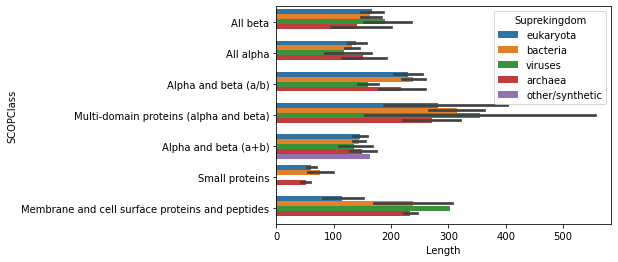

In [10]:
### Distribution of the Domain Lenghts Among Super-Kingdoms
sns.barplot( x="Length", y="SCOPClass", hue="Suprekingdom",  data=jpred)

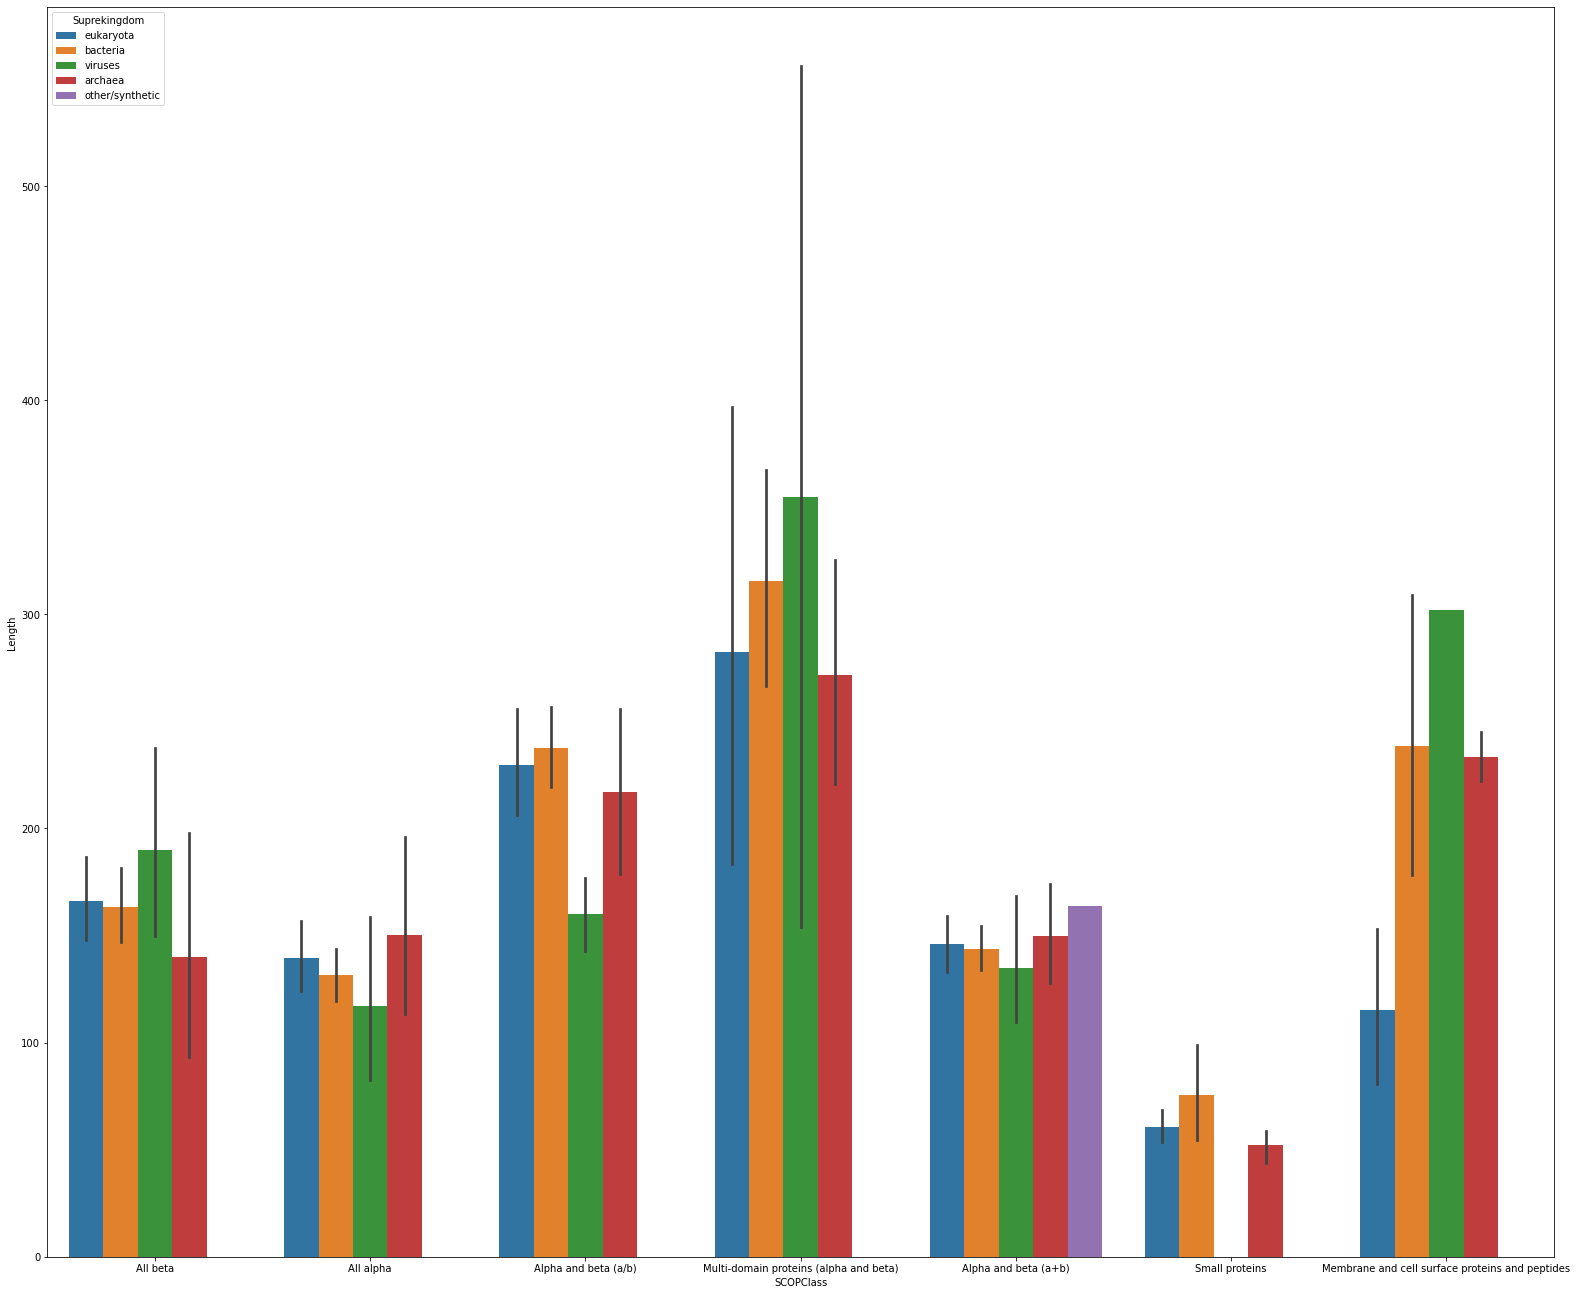

In [11]:
plt.figure(figsize=(27,23))
sns.barplot( x="SCOPClass", y="Length", hue="Suprekingdom",  data=jpred)

## [2. The relative abundance of secondary structure conformations](#2)

In [18]:
SCOP_count = pd.DataFrame(data=jpred['SCOPClass'].value_counts())
SCOP_count


,SCOPClass
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


In [24]:
df_new_colnames = SCOP_count.rename(columns={"SCOPClass": "Counts"})
df_new_colnames


,Counts
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


In [27]:
# Or adding the col name SCOPClass to col1
SCOP_count = jpred["SCOPClass"].value_counts()
colnames = SCOP_count.rename_axis("SCOPClass").to_frame("counts")
colnames
# neat_scopcount = SCOP_count.rename_axis('SCOPClass').to_frame('All counts')
# neat_scopcount  


,counts
SCOPClass,
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


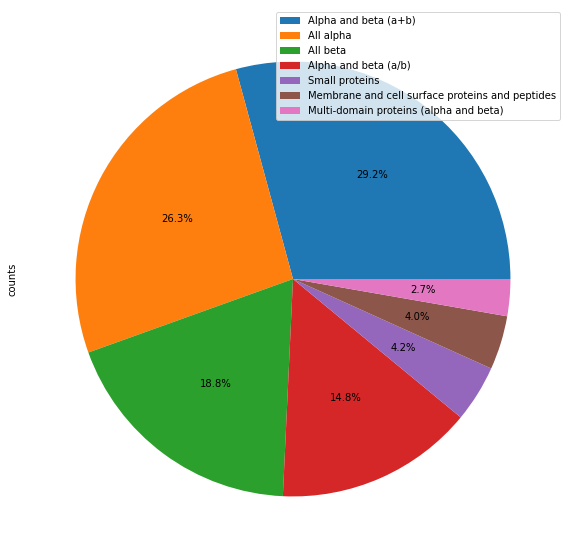

In [31]:
colnames.plot.pie(y="counts", autopct='%1.1f%%', figsize=(10,10),labels= None)

## [3. Comparative amino-acid composition of the Entire Dataset](#3aa-composition)
countplot normalized

In [35]:
# Generating DF from extracted data
length = 218421
aa_counts_dict = {'A': 18387, 'C': 2908, 'E': 15539, 'D': 12678, 'G': 15818, 'F': 8585, 'I': 12434, 'H': 4897, 'K': 13105, 'M': 4690, 'L': 20473, 'N': 8775, 'Q': 8353, 'P': 9851, 'S': 12576, 'R': 11430, 'T': 11902, 'W': 2983, 'V': 15645, 'Y': 7389, 'X': 3}
aa_counts_df = pd.DataFrame.from_dict(aa_counts_dict, orient = "index",columns=["TotalNumber"])
aa_counts_df["Aminoacids"] = aa_counts_df.index
aa_counts_df

,TotalNumber,Aminoacids
A,18387,A
C,2908,C
E,15539,E
D,12678,D
G,15818,G
F,8585,F
I,12434,I
H,4897,H
K,13105,K
M,4690,M


In [36]:
aa_counts_df["TotalNumber"] = aa_counts_df["TotalNumber"].div(length)
aa_counts_df

,TotalNumber,Aminoacids
A,0.084181,A
C,0.013314,C
E,0.071142,E
D,0.058044,D
G,0.072420,G
F,0.039305,F
I,0.056927,I
H,0.022420,H
K,0.059999,K
M,0.021472,M


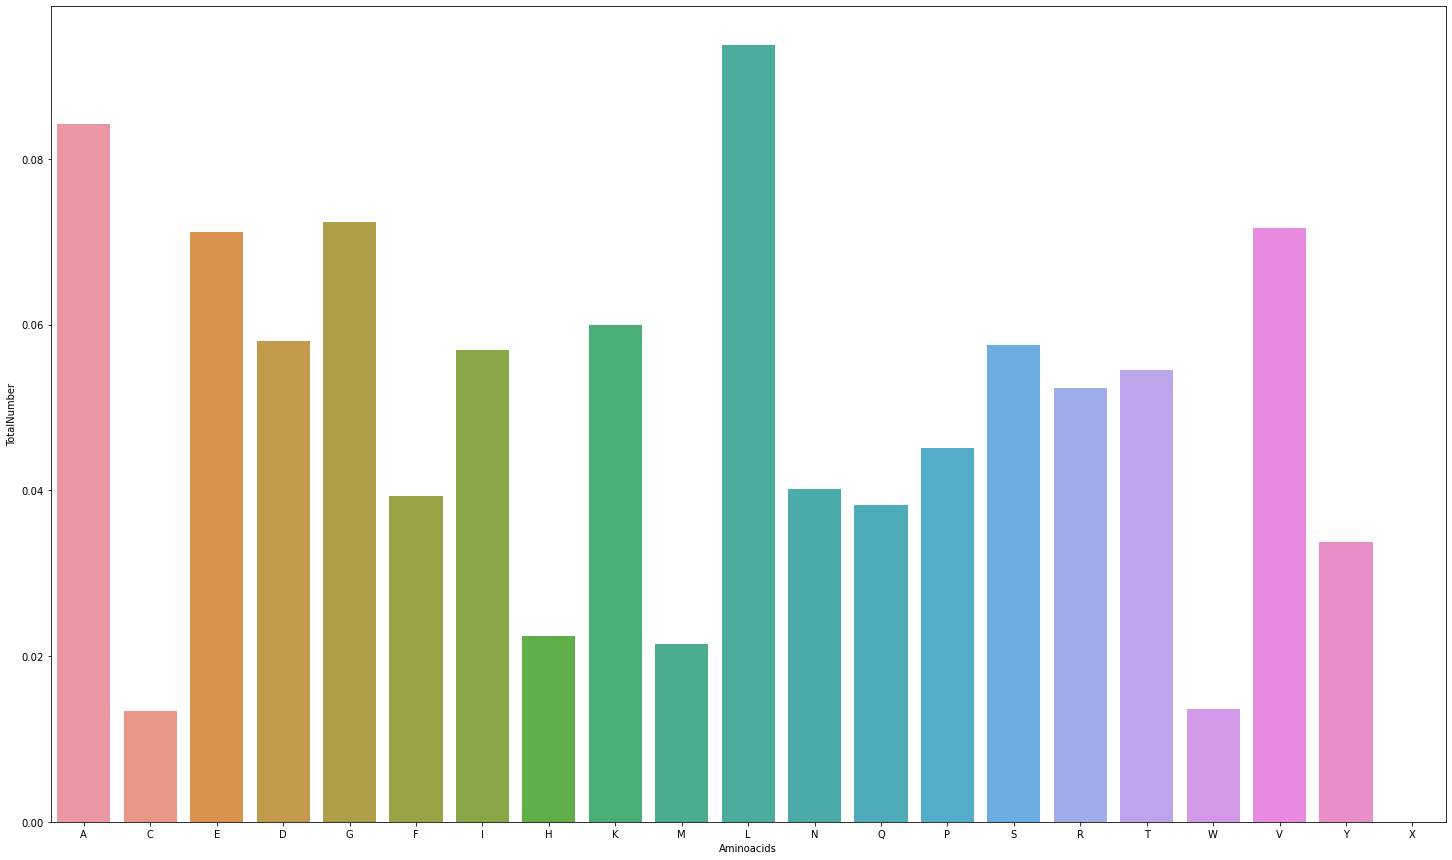

In [40]:
plt.figure(figsize=(25,15))
sns.barplot(x="Aminoacids", y= "TotalNumber", data=aa_counts_df)

## [3.2. Comparative Composition of the Fraction of Helix, Strand and Coil Residues](#5)

In [42]:
m=[['V', 'E', 6494, 48588], ['D', 'H', 3592, 77742], ['L', '-', 6096, 92091], ['H', 'E', 1105, 48588], ['Q', 'H', 3838, 77742], ['L', 'E', 4841, 48588], ['R', 'E', 2406, 48588], ['K', '-', 5336, 92091], ['Y', 'E', 2410, 48588], ['I', 'H', 4821, 77742], ['T', 'H', 3271, 77742], ['W', 'H', 1086, 77742], ['P', '-', 7250, 92091], ['Y', '-', 2470, 92091], ['T', '-', 5405, 92091], ['V', 'H', 5112, 77742], ['M', 'H', 2073, 77742], ['K', 'E', 2437, 48588], ['Y', 'H', 2509, 77742], ['A', 'H', 9118, 77742], ['E', 'H', 7450, 77742], ['C', 'H', 811, 77742], ['F', '-', 2870, 92091], ['E', 'E', 2321, 48588], ['X', '-', 3, 92091], ['E', '-', 5768, 92091], ['P', 'E', 1092, 48588], ['S', 'H', 3458, 77742], ['A', 'E', 3131, 48588], ['N', 'E', 1262, 48588], ['I', '-', 2979, 92091], ['K', 'H', 5332, 77742], ['C', '-', 1275, 92091], ['N', '-', 5204, 92091], ['G', 'E', 2414, 48588], ['D', 'E', 1598, 48588], ['S', '-', 6680, 92091], ['Q', 'E', 1401, 48588], ['W', '-', 1009, 92091], ['D', '-', 7488, 92091], ['S', 'E', 2438, 48588], ['W', 'E', 888, 48588], ['T', 'E', 3226, 48588], ['R', '-', 4209, 92091], ['L', 'H', 9536, 77742], ['H', '-', 2276, 92091], ['F', 'H', 3066, 77742], ['R', 'H', 4815, 77742], ['P', 'H', 1509, 77742], ['M', '-', 1598, 92091], ['H', 'H', 1516, 77742], ['A', '-', 6138, 92091], ['F', 'E', 2649, 48588], ['M', 'E', 1019, 48588], ['N', 'H', 2309, 77742], ['V', '-', 4039, 92091], ['G', '-', 10884, 92091], ['G', 'H', 2520, 77742], ['I', 'E', 4634, 48588], ['C', 'E', 822, 48588], ['Q', '-', 3114, 92091]]
corr= pd.DataFrame(m)
corr.columns = ['Aminoacids','SecondaryS','Correspondances', "SS_Ab"]
corr

,Aminoacids,SecondaryS,Correspondances,SS_Ab
0,V,E,6494,48588
1,D,H,3592,77742
2,L,-,6096,92091
3,H,E,1105,48588
4,Q,H,3838,77742
...,...,...,...,...
56,G,-,10884,92091
57,G,H,2520,77742
58,I,E,4634,48588
59,C,E,822,48588


In [44]:
corr["Correspondances"]=corr["Correspondances"].div(corr["SS_Ab"])
corr

,Aminoacids,SecondaryS,Correspondances,SS_Ab
0,V,E,0.133654,48588
1,D,H,0.046204,77742
2,L,-,0.066195,92091
3,H,E,0.022742,48588
4,Q,H,0.049368,77742
...,...,...,...,...
56,G,-,0.118187,92091
57,G,H,0.032415,77742
58,I,E,0.095373,48588
59,C,E,0.016918,48588


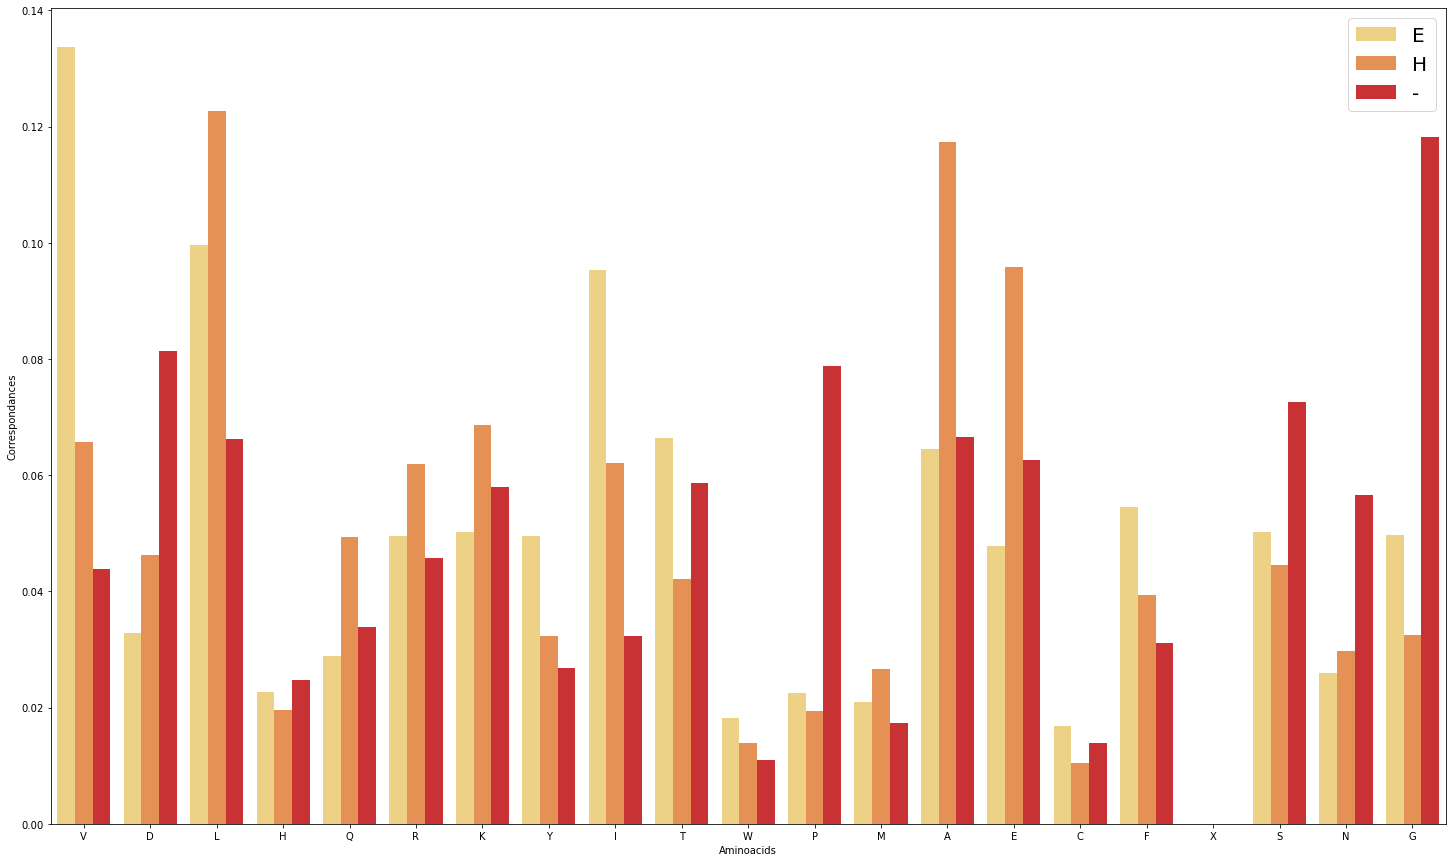

In [47]:
plt.figure(figsize=(25,15))
sns.barplot(x="Aminoacids",y="Correspondances",hue="SecondaryS",data=corr,palette="YlOrRd")
plt.legend(loc=1,prop={'size':20})

## [4. Taxonomic classification](#4) 
* At superkingdom (pie) and species level (pie or countplot, reducing the number of species to top 5/10/20)

In [52]:
superking_counts = jpred['Suprekingdom'].value_counts()
superking_counts

bacteria           689
eukaryota          488
archaea            108
viruses             62
other/synthetic      1
Name: Suprekingdom, dtype: int64

In [56]:
superking_counts_df = superking_counts.rename_axis('Superkingdom').to_frame('Counts')
superking_counts_df


,Counts
Superkingdom,
bacteria,689
eukaryota,488
archaea,108
viruses,62
other/synthetic,1


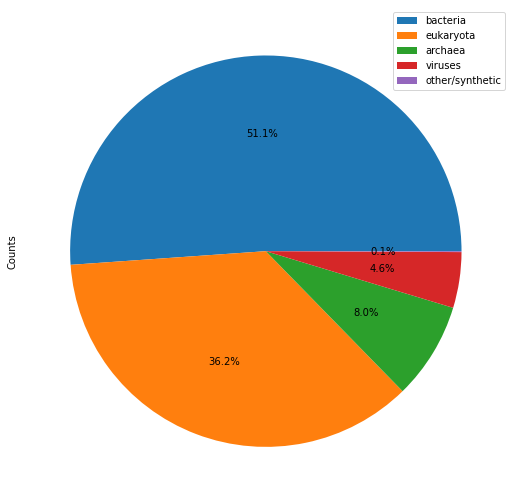

In [61]:
superking_counts_df.plot.pie(y='Counts', autopct='%1.1f%%', figsize=(9,9), labels=None)


### Most common species

Top 5/10/20

In [64]:
number_of_taxa = pd.DataFrame(data=jpred['TaxaName'].value_counts())
number_of_taxa



,TaxaName
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
...,...
Geobacillus stearothermophilus 10,1
Rhodospirillum rubrum,1
Crambe hispanica subsp. abyssinica,1
Alcaligenes faecalis,1


In [68]:
taxa_counts = jpred["TaxaName"].value_counts()
#
taxa_counts_df = taxa_counts.rename_axis("TaxaName").to_frame("counts")
taxa_counts_df

,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
...,...
Geobacillus stearothermophilus 10,1
Rhodospirillum rubrum,1
Crambe hispanica subsp. abyssinica,1


In [81]:
top_5 = taxa_counts_df.nlargest(5,['counts'])
top_10 = taxa_counts_df.nlargest(10, ['counts'])
top_20 = taxa_counts_df.nlargest(20,['counts'])


In [71]:
top_5

,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31


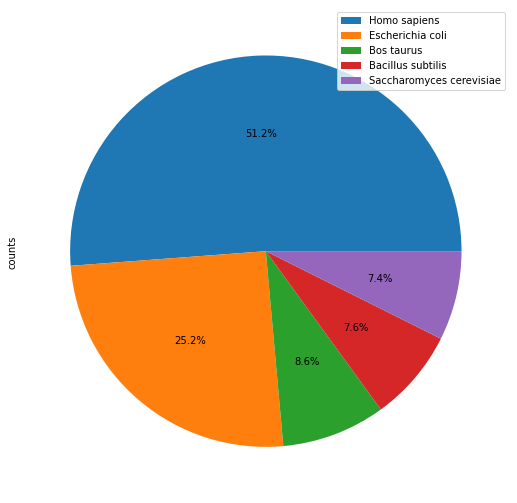

In [76]:
top_5.plot.pie(y='counts', autopct='%1.1f%%', figsize=(9,9), labels=None)

In [77]:
top_10


,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
Escherichia coli K-12,29
Mus musculus,28
Thermotoga maritima,22
Thermus thermophilus HB8,19


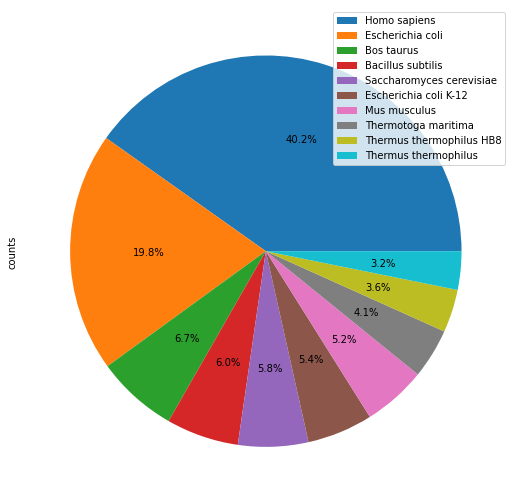

In [78]:
top_10.plot.pie(y='counts', autopct='%1.1f%%', figsize=(9,9), labels=None)

In [79]:
top_20

,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
Escherichia coli K-12,29
Mus musculus,28
Thermotoga maritima,22
Thermus thermophilus HB8,19


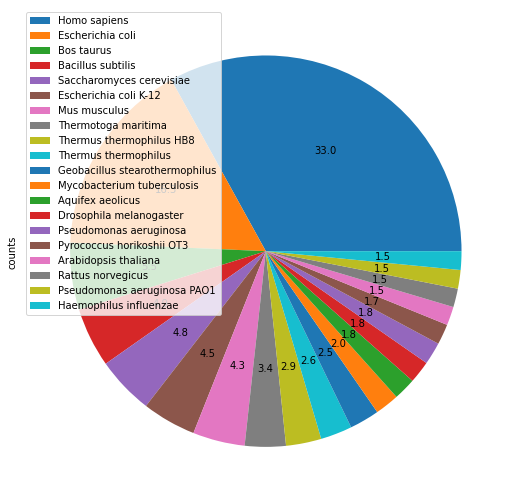

In [82]:
top_20.plot.pie(y='counts', autopct='%1.1f', figsize=(9,9), labels=None)

## [5. Structural classification (SCOP class)](#5)
pie/countplot

In [ ]:
scop_df = jpred['SCOPClass']

In [83]:
length = 218421
d2={'E': 48588, '-': 92091, 'H': 77742}
ss_comp= pd.DataFrame.from_dict(d2, orient = "index",columns=["TotalNumber"])
ss_comp["SecondaryStructure"] = ss_comp.index
ss_comp

,TotalNumber,SecondaryStructure
E,48588,E
-,92091,-
H,77742,H


In [84]:
ss_comp["TotalNumber"] = ss_comp["TotalNumber"].div(length)
ss_comp

,TotalNumber,SecondaryStructure
E,0.222451,E
-,0.421622,-
H,0.355927,H


<Figure size 1800x1080 with 0 Axes>

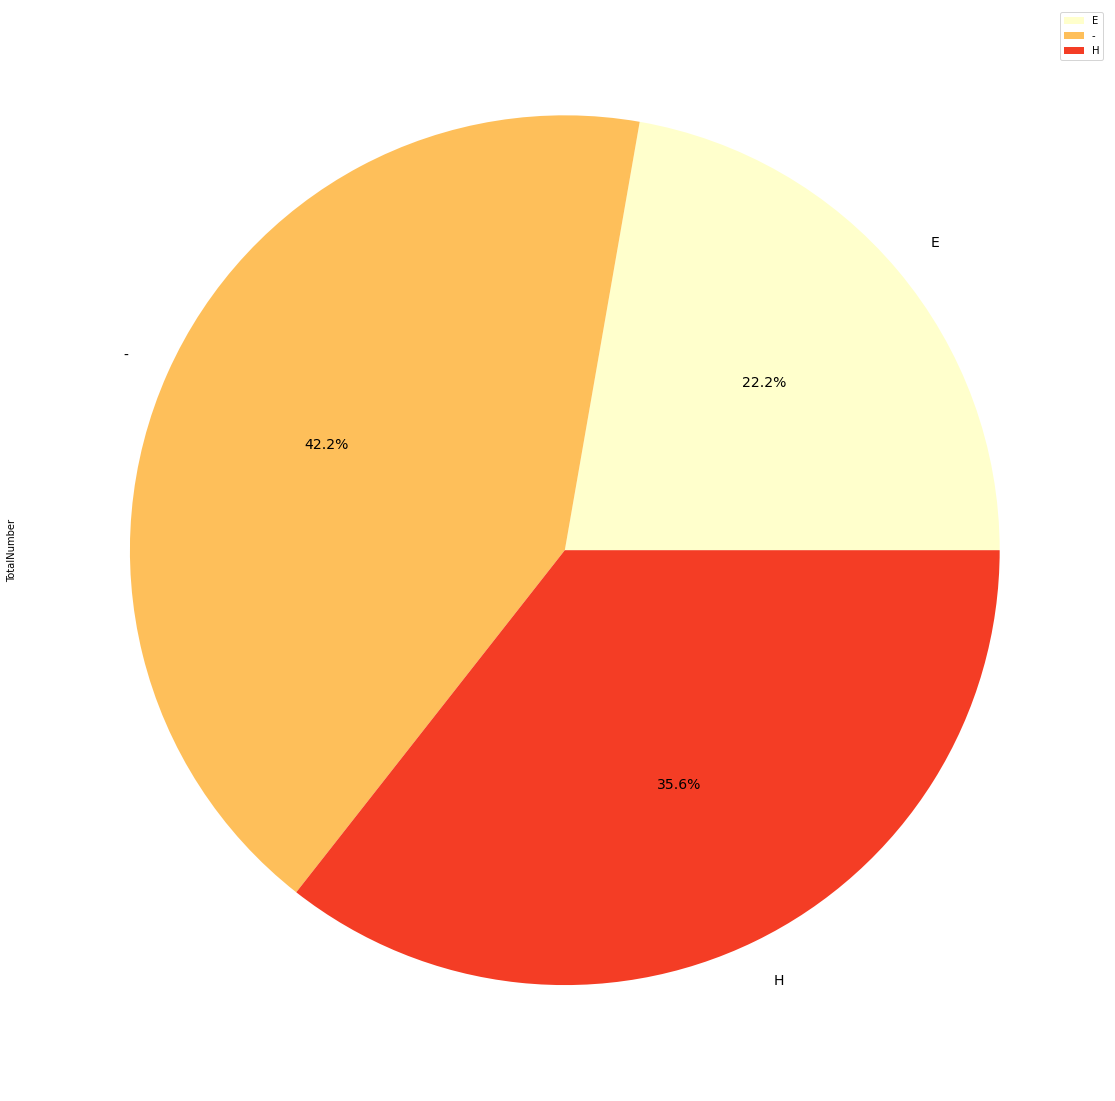

In [85]:
plt.figure(figsize=(25,15))
cmap = plt.get_cmap("YlOrRd")
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
ss_comp.plot.pie(y="TotalNumber", autopct='%1.1f%%', figsize=(20, 20), fontsize=14, colors=colors )

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


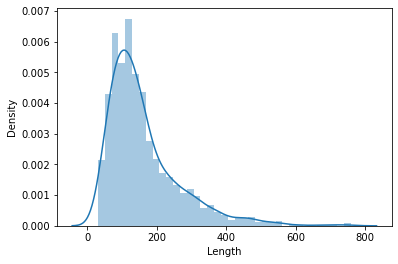

In [87]:
sns.distplot(jpred["Length"])